# Assignment 3 - Supervised Learning

## *Ana Belen Barcenas Jimenez*
Netid:  *ab713*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^{x}}= \frac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a) Likelihood function:

$$L(x_i;w) = \prod_{i=1}^{n}p(x_i)^{y_{i}}(1-p(x_i))^{1-y_{i}}$$

$$L(x_i;w) = \prod_{i=1}^{n}\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_{i}}(1-\sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_{i}}$$

$$L(x_i;w) = \prod_{i=1}^{n}\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}^{y_{i}}\Big(1-\frac{1}{1+e^{-(\mathbf{w}^T \mathbf{x}_i)}}\Big)^{1-y_{i}}$$

$$L(x_i;w) = \prod_{i=1}^{n}\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}^{y_{i}}\Big(1-\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}\Big)^{1-y_{i}}$$



(b) Cost function = negative of the log-likelihood:

$$C(\mathbf{w}) = -\frac{1}{n}\sum_{i=1}^{n}\Big[y_{i} log\big(\sigma(\mathbf{w}^T \mathbf{x}_i)\big) + (1-y_{i})log\big(1-\big(\sigma(\mathbf{w}^T \mathbf{x}_i)\big)\big)\Big]$$

$$C(\mathbf{w}) = -\frac{1}{n}\sum_{i=1}^{n}\Bigg[y_{i} log \Bigg(\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}\Bigg) + (1-y_{i})log\Bigg(1-log \Bigg(\frac{1}{1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}\Bigg)\Bigg)\Bigg]$$

$$C(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^{n}\big[(1-y_{i})(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}) + log\big(1+e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}\big)$$

(c)

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$$

First, I will take the derivative for a single w:

$$ \frac{\partial{C}}{\partial \mathbf{w}} = \Bigg[(1-y_{i})-\frac{e^{-wx}}{1-e^{-wx}}\Bigg]x = \Big[\frac{1}{1-e^{-wx}}-y_i\Big]x$$

Now, the partial derivative with respect of each parameter will be:

$$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right] $$

$$ = \Bigg[\Big(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\Big)x_0, \Big(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\Big)x_1, \Big(\frac{1}{1-e^{-(w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2})}}-y_i\Big)x_2 \Bigg]$$

(d)

$$ w_{i}^{new} = w_{i}^{old} + \eta\bigg( \frac{\partial LL(w_{i}^{old})}{\partial w_i^{old}}\bigg)$$  Where $LL$ is the Log-likelihood function.

$$= w_{i}^{old} + \eta\bigg[ \sum_{i=1}^{n}y_{i} - \sigma\big(\mathbf{w}^T \mathbf{x}_i \big)\bigg]$$


(e)

In [211]:
import numpy as np
import pandas as pd

data1 = pd.read_csv('/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/A3_Q1_data.csv')
data1.groupby('y').count()

,x1,x2
y,,
0.0,50000,50000
1.0,50000,50000


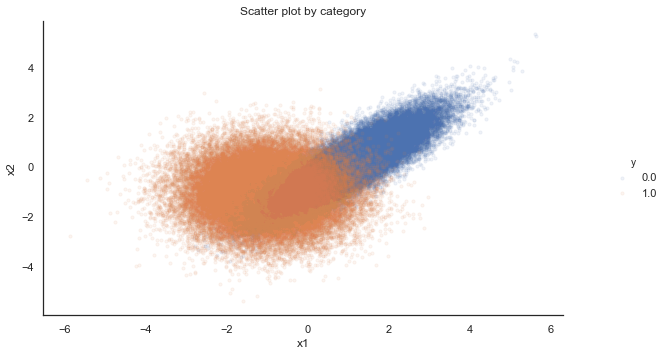

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('x1', 'x2', data1, hue='y', fit_reg=False, 
           scatter_kws={"alpha":0.08,"s":10})
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title("Scatter plot by category")
plt.show()

The dataset is perfectly balanced between the binary outcome $y=1$ and $y=0$. However, there is some overlap between the categories that makes difficult to classify those overlapping observations correctly. Logistic regression could a good option to classify those datapoints as long as we were willing to missclassify one of the category for the sake of classifying better the other category.

(f)

In [213]:
data1.isnull().values.any()

False

In [214]:
data1.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


There are no missing values in the data and seems unnecessary to apply scale differences.

(g)

In [215]:
# Let's define some arrays and variables that are going to be used:
w = np.array([1,1,1]) # example weights array
X = np.array(data1)[:,0:2] # regressors array
ones = np.ones((X.shape[0], 1)) # adding a ones column 
X_ = np.hstack((ones, X)) # regressors with ones array


def sigmoid(_w,_x):
    return 1 / (1 + np.exp(-(np.dot(_x,_w))))
# Test sigmoid function
h = sigmoid(w,X_)
print(w.shape)
print(X_.shape)


(3,)
(100000, 3)


(h)

In [216]:
# Let's reshape the dependent variable as an array
y = np.array(data1['y']).reshape(1,-1)

def cost(w,y,X_):
    h = sigmoid(w,X_)
    N = X_.shape[0] # total number of observations
    return 1/N * np.sum((-y * np.log(h) - (1 - y) * np.log(1 - h)))

c = cost(w,y,X_)
c

2.036273608943672

(i) 

In [217]:
# Divide data into training and test and formatting

data1_ = np.array(data1)

train = data1.sample(frac=0.7,random_state=200)
test = data1.drop(train.index)

train_x = np.array(train[['x1','x2']])
train_y = np.array(train['y']).reshape(1,-1)

test_x = np.array(test[['x1','x2']])
test_y = np.array(test['y']).reshape(1,-1)

print(train.shape)
print(test.shape)

(70000, 3)
(30000, 3)


In [218]:
# Calculating the transpose and adding row of 
# ones for future calculations
ones = np.ones((train_x.shape[0], 1)) # adding a ones column 
train_x_ = np.hstack((ones, train_x))

ones = np.ones((test_x.shape[0], 1)) # adding a ones column 
test_x_ = np.hstack((ones, test_x))
test_x_.shape

(30000, 3)

In [219]:
# Gradient descent function 
def gradientd(_w, _x, _y, _eta):
    parameters = []
    w_old = _w
    w_new = _w
    dst = 1
    sig = 0
    iteration = 0
    eta = _eta # Learning rate
    

    while dst > 1e-6:
        w_old = w_new.reshape(-1,1)
        sig = sigmoid(w_old,_x)
        gradient_ = np.dot( _x.T ,(sig-_y) ) / _x.shape[0]
        #gradient = (np.dot( (sig-_y),_x.T)) #/ _x.shape[0]   
        w_new = w_old - eta * gradient_
        dst = np.linalg.norm(w_new - w_old)
        parameters.append(w_new)
        
    return parameters

#(j)

# function to print out cost function for each w estimate
def parameters_cost(parameters, X_, y):
    iteration = 0
    costs = []
    for each in parameters:
        costs.append(cost(X_.shape[1], y, sigmoid(each, X_)))
        
    return costs



In [220]:
#(k)

test_x__=test_x_
test_y__=test_y.reshape(-1,1)

train_x__=train_x_
train_y__=train_y.reshape(-1,1)

# Training dataset: eta = 0.05
eta_05= gradientd(w, train_x__, train_y__, 0.05)

train_e05_costs = parameters_cost(eta_05, train_x__, train_y__)
test_e05_costs = parameters_cost(eta_05, test_x__, test_y__)

# Training dataset: eta = 0.10
eta_10= gradientd(w, train_x__, train_y__, .10)

train_e10_costs = parameters_cost(eta_10, train_x__, train_y__)
test_e10_costs = parameters_cost(eta_10, test_x__, test_y__)

# Training dataset: eta = 0.25
eta_25= gradientd(w, train_x__, train_y__, .25)

train_e25_costs = parameters_cost(eta_25, train_x__, train_y__)
test_e25_costs = parameters_cost(eta_25, test_x__, test_y__)

# Training dataset: eta = 0.75
eta_75= gradientd(w, train_x__, train_y__, 1)

train_e75_costs = parameters_cost(eta_75, train_x__, train_y__)
test_e75_costs = parameters_cost(eta_75, test_x__, test_y__)

<function matplotlib.pyplot.show>

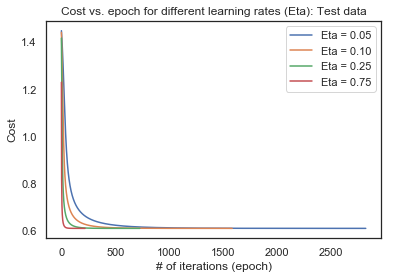

In [221]:
plt.plot(test_e05_costs, label='Eta = 0.05')
plt.plot(test_e10_costs, label='Eta = 0.10')
plt.plot(test_e25_costs, label='Eta = 0.25')
plt.plot(test_e75_costs, label='Eta = 0.75')
plt.title("Cost vs. epoch for different learning rates (Eta): Test data")
plt.xlabel("# of iterations (epoch)")
plt.ylabel("Cost")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show>

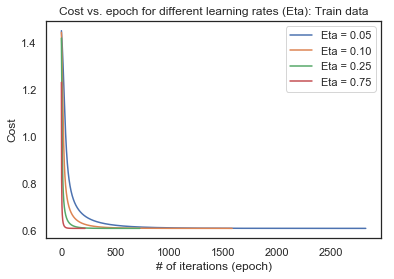

In [222]:
plt.plot(train_e05_costs, label='Eta = 0.05')
plt.plot(train_e10_costs, label='Eta = 0.10')
plt.plot(train_e25_costs, label='Eta = 0.25')
plt.plot(train_e75_costs, label='Eta = 0.75')
plt.title("Cost vs. epoch for different learning rates (Eta): Train data")
plt.xlabel("# of iterations (epoch)")
plt.ylabel("Cost")
plt.legend(loc='upper right')
plt.show

On one hand, when the learning rate is higher, the necessary iterations to converge to the minimum cost are less than the number of iterations needed when the learning rate is smaller. However, if the learning rate is too high, it is possible to exceed the lower point and then converge to a point that is not the minimum. On the other hand, an low learning rate could be computational expensive. I will choose the learning rate = 0.25 since converges way faster than 0.05 and pretty close to eta=0.75 and 1.

<Figure size 720x576 with 0 Axes>

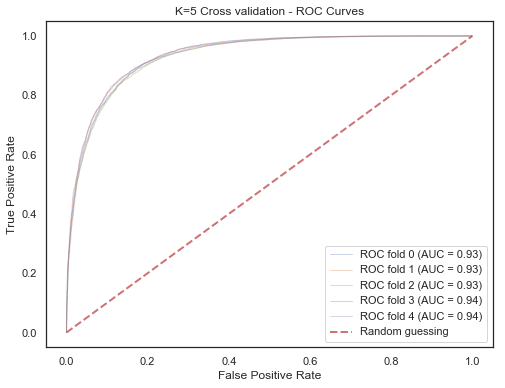

In [223]:
# (l)
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))

skf = StratifiedKFold(n_splits=5)

mean_fpr = np.linspace(0, 1, 100)
iteration = 0
plt.figure(figsize=(8, 6))
for train_index, test_index in skf.split(train_x__, train_y__):
   
    train_kth_x = train_x__[train_index]
    test_kth_x = train_x__[test_index]
    train_kth_y = train_y__[train_index]
    test_kth_y = train_y__[test_index]
    
    allweights = gradientd(w, train_kth_x, train_y__[train_index] ,.75)
    w_old = allweights[len(allweights)-1]
    
    predictions = sigmoid(w_old, test_kth_x)
    
    fpr, tpr, thresholds = roc_curve(test_kth_y, predictions)
    

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (iteration, roc_auc))
    iteration += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random guessing', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K=5 Cross validation - ROC Curves')
plt.legend(loc="lower right")
plt.show()    
    


**(m)**

Cross validation lead us to a more accurate performance measure since we will test the performance of our model in many different combinations of the dataset. Also, it is appropriate to tune some parameters and test them again in a different k-1 combination of subsets. Last but not least, in some cases we have a limited amount of observations and diving the data into train and test would be harmful because we would have to train with a small number of observations, cross validation is a good approach to take more advantage of the available data.

**(n)**

In [224]:
# (n) Training data and test data plots
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
ones = np.ones_like(xx).reshape(-1,1)
grid = np.c_[ones.ravel().reshape(-1,1),
             xx.ravel().reshape(-1,1),
             yy.ravel().reshape(-1,1)]

probs = sigmoid(w_old, grid).reshape(xx.shape[0],xx.shape[1])


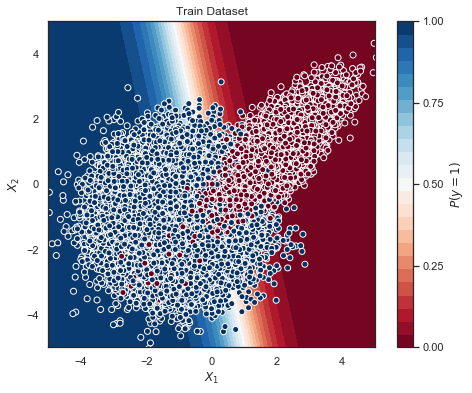

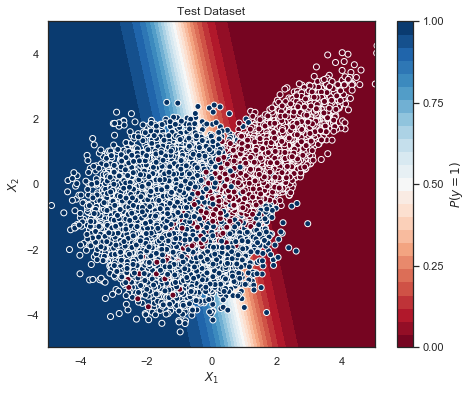

In [225]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(x="x1", y="x2",c="y", data=train,alpha=1, 
           cmap="RdBu",edgecolor='white' )
ax.set_title('Train Dataset')
ax = ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$") 


f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])
ax.scatter(x="x1", y="x2",c="y", data=test,alpha=1, 
           cmap="RdBu",edgecolor='white' )
ax.set_title('Test Dataset')
ax = ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$") 


**(o)**

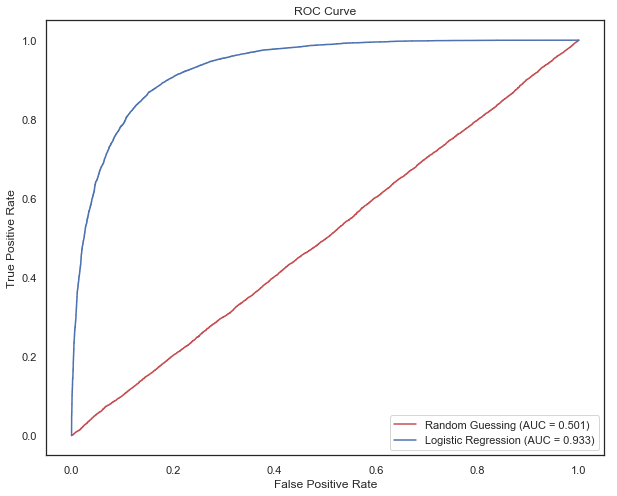

In [226]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc

plt.figure(figsize=(10, 8))

# Random guessing
y_random = np.random.rand(test_y__.shape[0],1)
fpr, tpr, _  = (roc_curve(test_y__,y_random, pos_label=1))
auc_random = auc(fpr,tpr)

# Logistic model
y_model = sigmoid(w_old, test_x__)
fp, tp, _  = (roc_curve(test_y__,y_model, pos_label=1))
auc_model = auc(fp,tp)

plt.title("ROC Curve")
plt.plot(fpr,tpr,c='r',
         label='Random Guessing (AUC = %0.3f)' % (auc_random))
plt.plot(fp,tp,c='b',
         label='Logistic Regression (AUC = %0.3f)' % (auc_model))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


From the plot above we can observe that the area under the curve generated by the logistic regression model is 93.3% compared with a random guessing that is 50.3%. This metric suggests that the logistic model performs way better than doing a random guessing to classify.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [227]:
# Import libraries
from mlxtend.data import loadlocal_mnist
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**(a)**

In [228]:
# Dataset
from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
       images_path='/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/Assn3/train-images-idx3-ubyte',
       labels_path='/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/Assn3/train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist(
       images_path='/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/Assn3/t10k-images.idx3-ubyte',
       labels_path='/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML/Assn3/t10k-labels.idx1-ubyte')
label_train = 1 * (y_train == 3)
label_test = 1 * (y_test == 3)
class0 = np.array(np.where(y_train != 3)[0])[:10]
class1 = np.array(np.where(y_train == 3)[0])[:10]

**(b)**

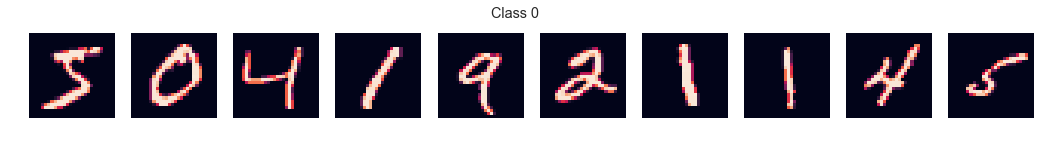

In [229]:
# Training dataset - Class 1 examples
fig, axes = plt.subplots(1, 10, figsize = (18,2))
axes = axes.ravel()
[axi.set_axis_off() for axi in axes.ravel()]
for i,ind in enumerate(class0):
    axes[i].imshow(X_train[ind].reshape(28,28))
plt.suptitle("Class 0")
plt.show()

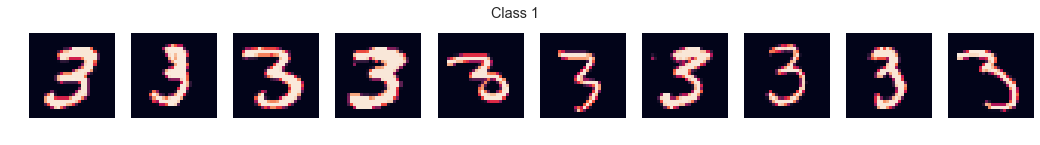

In [230]:
# Training dataset - Class 1 examples
fig, axes = plt.subplots(1, 10, figsize = (18,2))
axes = axes.ravel()
[axi.set_axis_off() for axi in axes.ravel()]
for i,ind in enumerate(class1):
    axes[i].imshow(X_train[ind].reshape(28,28))
plt.suptitle("Class 1")
plt.show()

**(c)**

In [231]:
print("Class 1 in train data set:",sum(label_train==1), 
      "observations")
print("Class 0 in train data set:",sum(label_train==0), 
      "observations", "\n")

print("Class 1 in test data set:",sum(label_test==1), 
      "observations")
print("Class 0 in test data set:",sum(label_test==0), 
      "observations", "\n")

print("Proportion of class 1 in the whole dataset:",
      (sum(label_test==1)+sum(label_train==1))*100
      /(sum(label_test==0)+sum(label_train==0)+
        sum(label_test==0)+sum(label_train==0)),"%", "observations")


Class 1 in train data set: 6131 observations
Class 0 in train data set: 53869 observations 

Class 1 in test data set: 1010 observations
Class 0 in test data set: 8990 observations 

Proportion of class 1 in the whole dataset: 5.680173085795192 % observations


This dataset is not well balanced since our target variable is only 5.7% of the total observations. This could cause problems when classifying because the algorithm could classify everything as Class 0 and show really good performance measures becuase indeed, most of the observations are class 0 in both the training and the test dataset. However, the number of observations we hacve is large enough to fit a classification model, keeping in mind that the issue mentionated above could arise and being extgremely careful when interpreting the performance metrics.

**(d)**

The following approach to classify Class1 and Class0 images is a Ranfom Forest employing Cross Validation with 5 splits.


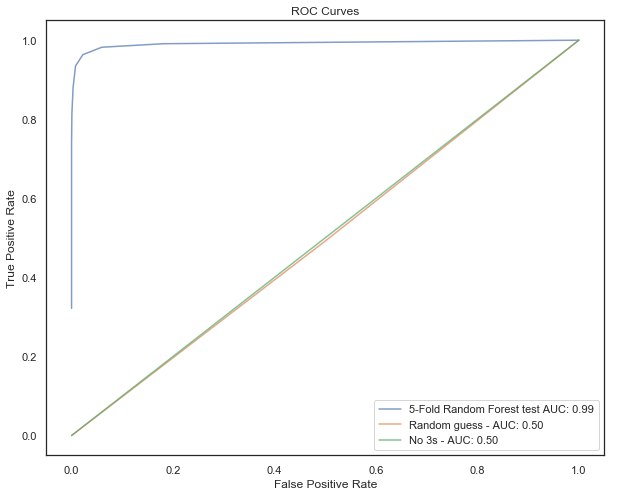

In [232]:
# ROC CURVES

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(10, 8))

kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X_train):
    class_pred_rf = []
    class_test_rf = []
    # Dividing data into train and test samples
    xtrain, xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = label_train[train_index], label_train[test_index]
    # Fitting a random forest and saving the predictions
    rf = RandomForestClassifier()
    rf.fit(xtrain, ytrain)
    class_pred_rf.append(rf.predict_proba(xtest)[:,1])
    class_test_rf.append(ytest)
    
# Random Forest - Cross validation
ypred_test_rf = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresh = roc_curve(label_test,ypred_test_rf)
auc_rf = auc(fpr,tpr)
plt.plot(fpr, tpr,alpha=0.7,
         label='{}-Fold Random Forest test AUC: {:01.2f}'.format(n, auc_rf))

# Classifier that randomly guesses
random = np.random.choice(2,len(label_test))
fpr_rand, tpr_rand, thresholds2 = roc_curve(label_test,random)
auc_rand = auc(fpr_rand, tpr_rand)
plt.plot(fpr_rand, tpr_rand,alpha=0.7,
         label='Random guess - AUC: {:01.2f}'.format(auc_rand))

# Classifier that guesses there are no 3's
fpr_zero, tpr_zero, thresholds1 = roc_curve(label_test,
                                            np.zeros(len(label_test)))
auc_zero = auc(fpr_zero, tpr_zero)
plt.plot(fpr_zero, tpr_zero,alpha=0.7,label='No 3s - AUC: {:01.2f}'.format(auc_zero))

# Plotting the ROC curves together
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

From the ROC curves above we can conclude that the Random Forest using Cross Validation performs way better than a random guessing of the class. It is unclear the difference in the ROC curve between random guessing, both has an area under the curve near to zero. However, seems that Assigning everything to Class 0 performs better than random guessing based on the AUC. 

In this type of classification problems it is necessary to prioritize what type of classification is more important and/or less costly to decide what model performs better based on the especific problem. In this case, we are interested in classifying numbers 3. Thus, random guessing would be a better approach since the model could randomly classify 3's successfully (while the other approach will never classify something as a 3).

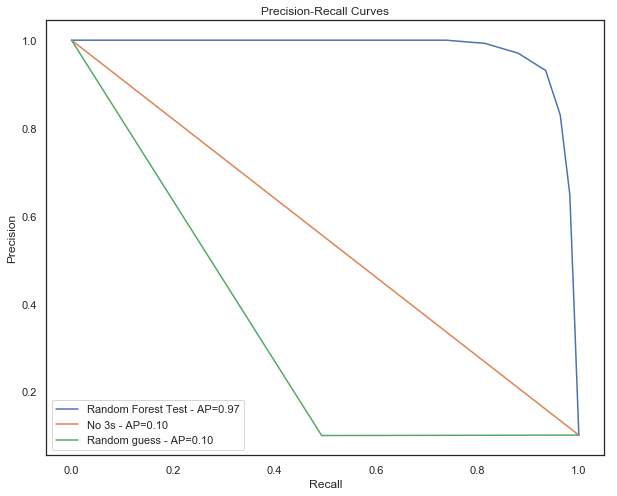

In [233]:
# PRECISION-RECALL CURVES

plt.figure(figsize=(10, 8))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Random Forest - Cross validation
precision_kfold_test, recall_kfold_test, _ = precision_recall_curve(label_test, np.hstack(ypred_test_rf))
avg_precision_test = average_precision_score(label_test,ypred_test_rf)
plt.plot(recall_kfold_test, precision_kfold_test,
       label="Random Forest Test - AP={0:0.2f}".format(avg_precision_test))

# Classifier that guesses there are no 3's
precision_zero, recall_zero, _ = precision_recall_curve(label_test, np.zeros(len(label_test)))
avg_precision_zero = average_precision_score(label_test,np.zeros(len(label_test)))
plt.plot(recall_zero, precision_zero,
       label = "No 3s - AP={0:0.2f}".format(avg_precision_zero))

# Classifier that randomly guesses
precision_rnd, recall_rnd, _ = precision_recall_curve(label_test,np.random.choice(2,len(label_test)))
avg_precision_rnd = average_precision_score(label_test,random)
plt.plot(recall_rnd, precision_rnd,
       label = "Random guess - AP={0:0.2f}".format(avg_precision_rnd))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title("Precision-Recall Curves")
plt.show()

From the Precision-Recall curves above we can conclude again that the Random Forest with Cross Validation performs better than random guessing and assigning Class 0 to every observation. As was depicted from the ROC curves, random guessing seems to be the one with worst performance overall. However, given the objective of this problem (classify numbers 3), random guessing could be a better approach compared with assigning Class 0 to all of the observations.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a) Employee attrition**

Employee attrition or high turnover rate can be costly. The hiring and training process is an investment companies made and if the employees last a short period of time in the company, the company is not getting back a return on that money invested. Also, the termination process incurs in additional costs for the company as well as the process to hire a replacement. On the other hand, the operations of a company could be harmed due to the change in the office structure.

In sum, companies are interested in retaining valuable employees. Understading the main reasons why employees left is of outmost importance to take actions regarding this matter. The objective of this analysis is to understand what factors lead to employee attrition. The dataset used is a fictional dataset created by IBM Watson Analytics: https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/.

**(b) & (c)**

In [234]:
# Import libraries
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Loading the dataset
df = pd.read_csv('/Users/anabelen/Documents/MIDS/Spring 2019/Intro. to ML//Assn3/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [235]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [236]:
# Let's drop some variables whose values do not change along the dataset 
# and some whose meaning is unclear
df.drop(['StandardHours','EmployeeCount', 'EmployeeNumber','Over18', 
         'HourlyRate', 'MonthlyRate', 'OverTime', 'StockOptionLevel', 
         'RelationshipSatisfaction', 'DailyRate', 'TrainingTimesLastYear'], 
        axis=1, inplace=True)
# Performance Rating should take values from 1 to 4 but in this case we just 
# have cases with 3 and 4. I will drop that variable because the available 
# observations are not enough.
df.drop(['PerformanceRating'], axis=1, inplace=True)

In [237]:
# Checking missing values
pd.DataFrame(len(df['Attrition']) - df.isnull().sum(), columns = ['Count'])

,Count
Age,1470
Attrition,1470
BusinessTravel,1470
Department,1470
DistanceFromHome,1470
Education,1470
EducationField,1470
EnvironmentSatisfaction,1470
Gender,1470
JobInvolvement,1470


There are no missing values in the dataset.

**Plotting the data**

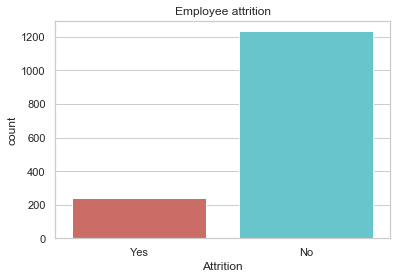

In [238]:
# Let's see the distribution of our dependent variable:
sns.countplot(x='Attrition',data=df, palette='hls').set_title('Employee attrition')
plt.show()

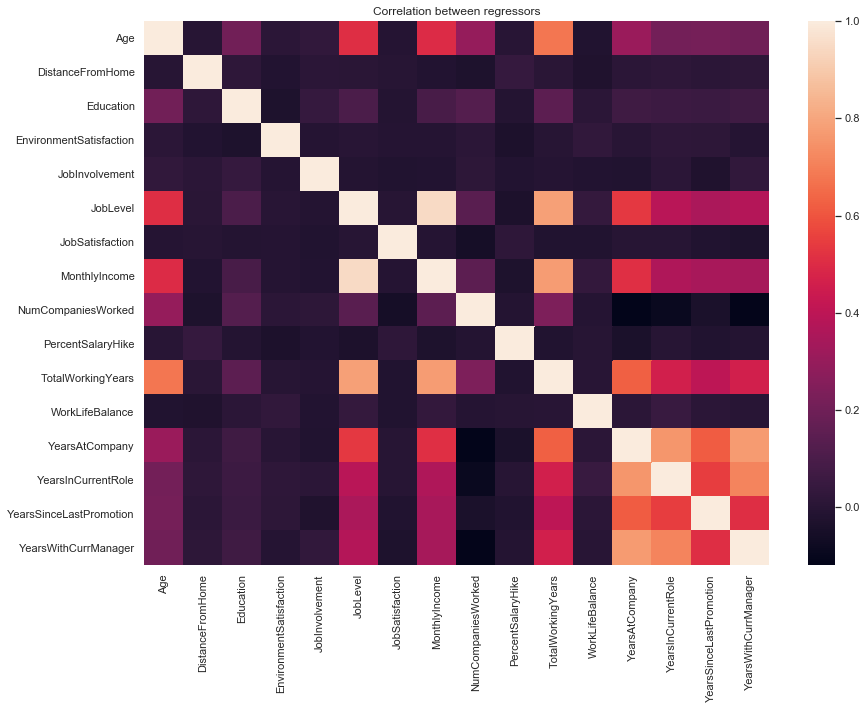

In [239]:
# Let's see how the predictors correlate with each other for feature selection.
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

ax=sns.heatmap(df.corr()).set_title('Correlation between regressors')

From the plot above, the following regressors seems to be highly correlated:

1) Job level / **Monthly income**

2) **Performance rating** / Percent salary hike

3) Total working years / **Years at company** / Years in current role / Years since last promotion / Years with current manager

I will keep the bolded variables and get rid of the rest to avoid multicollinearity between regressors. The ones I chose are the most generic of each group.

In [240]:
# Drop variables highly correlated between each other
df.drop(['JobLevel','PercentSalaryHike', 'TotalWorkingYears','YearsInCurrentRole', 
         'YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked'], 
        axis=1, inplace=True)

In [241]:
print(list(df.columns))

['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany']


In [242]:
df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,WorkLifeBalance,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,Sales Executive,4,Single,5993,1,6
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,Research Scientist,2,Married,5130,3,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,Laboratory Technician,3,Single,2090,3,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,Research Scientist,3,Married,2909,3,8
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,Laboratory Technician,2,Married,3468,3,2


Job related regressors vs. Attrition


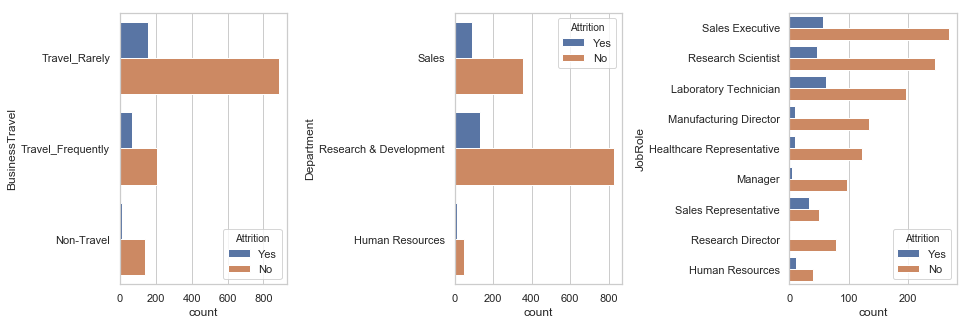

In [243]:
# Now, let's see the relationship between regressor and the dependent variable.
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.4, wspace=1)
sns.countplot(y="BusinessTravel", hue="Attrition", data=df, ax=axs[0])
sns.countplot(y="Department", hue="Attrition", data=df, ax=axs[1])
sns.countplot(y="JobRole", hue="Attrition",data=df, ax=axs[2])

print("Job related regressors vs. Attrition")
plt.show()


From this plots we can observe that there are not enough observations in each of the categories such as Non-Travel, Human Resources department, Research Director role, among others. Since our objective is to predict Attrition, I will not include these regressors in the model because we need enough observations in each category for both: people that has leave the work and people that has not.

Demographic variables vs. Attrition
(Education range: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')


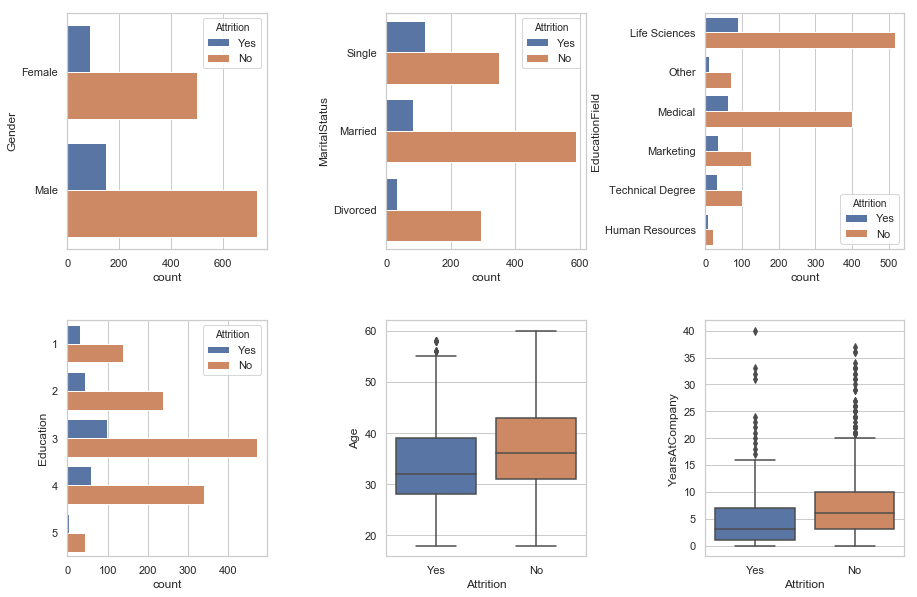

In [244]:
fig, axs = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(15, 10)
fig.subplots_adjust(hspace=.3, wspace=.6)
sns.countplot(y="Gender", hue="Attrition", data=df, ax=axs[0,0])
sns.countplot(y="EducationField", hue="Attrition",data=df, ax=axs[0,2])
sns.countplot(y="MaritalStatus", hue="Attrition",data=df, ax=axs[0,1])
sns.countplot(y="Education", hue="Attrition",data=df, ax=axs[1,0])
sns.boxplot(x="Attrition", y="Age", data=df, ax=axs[1,1])
sns.boxplot(x="Attrition", y="YearsAtCompany", data=df, ax=axs[1,2])

print("Demographic variables vs. Attrition")
print("(Education range: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')")
plt.show()

In both education related variables, there is not enough information of people who has leave the company. I will not include those variables in the model.

Demographic variables vs. Attrition (cont.)


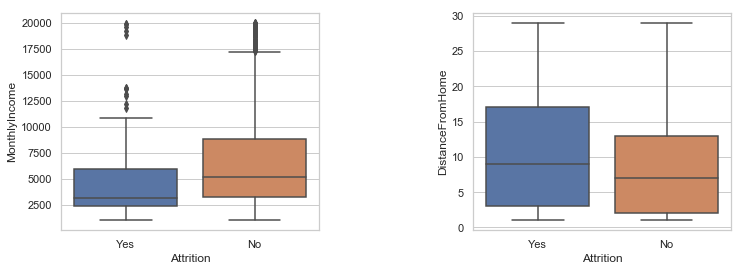

In [245]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(12, 4)
fig.subplots_adjust(hspace=.5, wspace=.6)
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, ax=axs[0])
sns.boxplot(x="Attrition", y='DistanceFromHome', data=df, ax=axs[1])


print("Demographic variables vs. Attrition (cont.)")
plt.show()

Job related - Survey data
(Every variable ranges from 1 to 4 with 1 being low/very bad and 4 being high/very good)


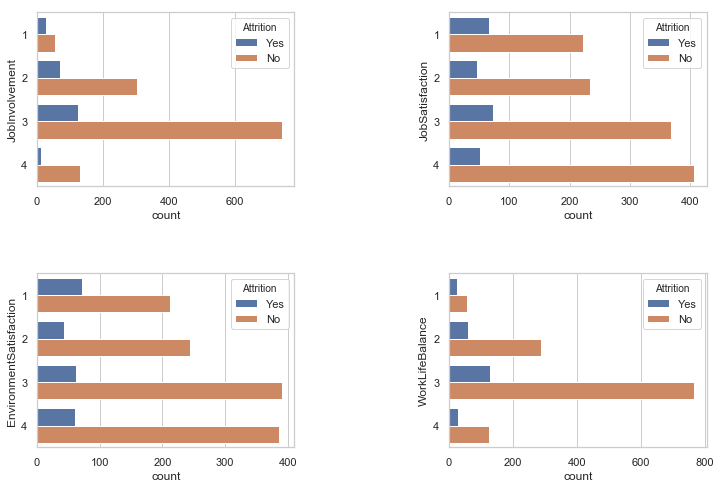

In [246]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 8)
fig.subplots_adjust(hspace=.5, wspace=.6)
sns.countplot(y='JobInvolvement', hue="Attrition", data=df, ax=axs[0,0])
sns.countplot(y="JobSatisfaction", hue="Attrition",data=df, ax=axs[0,1])
sns.countplot(y="EnvironmentSatisfaction", hue="Attrition",data=df, ax=axs[1,0])
sns.countplot(y="WorkLifeBalance", hue="Attrition",data=df, ax=axs[1,1])

print("Job related - Survey data")
print("(Every variable ranges from 1 to 4 with 1 being low/very bad and 4 being high/very good)")
plt.show()


In [247]:
# Let's drop variables without enough information to fit the model:
df.drop(['Education', 'EducationField', "BusinessTravel", 'Department', 'JobRole'], axis=1, inplace=True)

In [248]:
df.head(5)

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,WorkLifeBalance,YearsAtCompany
0,41,Yes,1,2,Female,3,4,Single,5993,1,6
1,49,No,8,3,Male,2,2,Married,5130,3,10
2,37,Yes,2,4,Male,2,3,Single,2090,3,0
3,33,No,3,4,Female,3,3,Married,2909,3,8
4,27,No,2,1,Male,3,2,Married,3468,3,2


In [249]:
# Let's generate a binary variable for Attrition:
binary = { 'Attrition' : {'Yes':1, 'No':0},'OverTime': {'Yes':1 , 'No':0}}
df.replace(binary, inplace=True)
# Transform categorical variables to dummies
df = pd.get_dummies(df, columns =['Gender', 'MaritalStatus'])

**(d)**

I will use logistic regression because the objective is to predict Attrition but also to understand how each regressor is related with Attrition to provide insights about what the companies can do to retain valuable employees. Logistic regression is an approach that not only performs well with classification problems but also the coefficients are easy to interpret and the final result could be interpreted as an score of how likely is that employee X will leave the company. More sophisticated techniques such as survival anlysis could be employed for further analysis.

**(e)**

I will evaluate the performance of the model with the area under a ROC curve as well as with a confusion matrix. My analysis will be focused on identifying how well the model minimize the false negative rate. The main objective is to perform retention strategies to those valuable employees with attrition risk. Thus, I will prioritize a model in which employees with attrition risk are effectively identified (reducing the number of false negative classifications).

**(f)**

I am going to into training and testing datasets. The number of observations seems appropriate and since I have an small amount of explanatory variables, the risk of overfitting is low. Moreover, dividing into train and test is computationally cheaper compared with cross validation.

In [250]:
print(list(df.columns))

['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany', 'Gender_Female', 'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


In [251]:
# Re-order columns
df = df[['Attrition', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 
         'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany', 'Gender_Female', 
         'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']]
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1102, 13)
(368, 13)


**(g)** 

In [252]:
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [253]:
print(list(df.columns))
classifier.coef_


['Attrition', 'Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany', 'Gender_Female', 'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


array([[-1.25483281e-02,  3.02905992e-02, -1.66060669e-01,
        -2.37884594e-01, -2.27920221e-01, -8.03173032e-05,
        -1.50425442e-01, -3.75444161e-02,  2.25913268e-01,
         4.10085661e-01, -2.08488707e-01,  8.16770227e-02,
         7.62810614e-01]])

In [254]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [255]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [256]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91       310
          1       0.33      0.02      0.03        58

avg / total       0.76      0.84      0.77       368



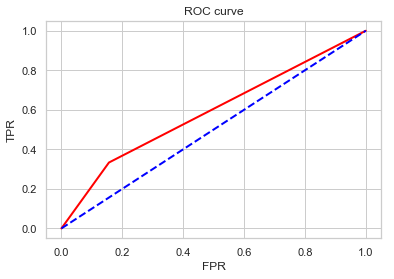

In [257]:
# Computing false and true positive rates

fpr, tpr,_=roc_curve(classifier.predict(X_test), y_test, drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()

#  ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [258]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
print("Area under the curve:")
roc_auc_score(classifier.predict(X_test), y_test)


Area under the curve:


0.5885844748858446

In [259]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)


Confusion Matrix


array([[308,   2],
       [ 57,   1]])

Overall, the model seems to perform well. The area under the curve is great as well as some of the performance metrics. However, the model does not seems to be accurate when predicting true positive values based on the confusion matrix.

**(h)**

The supervised algorithm implemented above performs well in spite of having a small number of predictors. The logistic regression is trained with 75% of the available data and then is tested on the remaining 25%. The classification obtained from testing the model in the test dataset is compared with the actual values of y to determine how well does the classifier work. The objective is to maximize the number of accurate predictions of employee attrition (Attrition=1). The logistic regression gives us the opportunity to further explore the coefficients of each regressor and their relationship with the actual attrition rate. This information could provide the decision makers with data-driven strategies to retain valuable employees before the decide to leave.

Given the results obtained, may be the case that employing cross validation to take even more advantage of the data available could be a better approach since the number of actual attrition cases is lower than the contrary cases. Could be possible that we are not having an optimal number of observations to apply a simple split into train and test dataset and that could explain the not so great performance of this model.

**(i)**

The analysis performed above is capable of understanding the main factors that drives employees to leave their job. The model trained could be employed with new data to predict what is the probability that an specific employee will leave the company. This model is powerful because an accurate interpretation of it can prevent high turnover rates if human resources take quick actions before valuable employees actually leave their work. Moreover, the score that results by fitting a logistic approach could be helpful to prioritize taking actions towards those employees with higher attrition risk.

**References:**

https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

https://www.kaggle.com/wilsonf/logistic-regression-cv-test

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8